In [9]:
# ==============================================================================
#           CELL 1: Library Imports and Data Loading
# ==============================================================================

# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# URL for the dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(URL)

# --- show head ---
# Display the first 5 rows to get a quick look at the data
print("--- First 5 Rows (df.head()) ---")
print(df.head())

--- First 5 Rows (df.head()) ---
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [10]:
# ==============================================================================
#           CELL 2: Basic Data Inspection
# ==============================================================================

# --- df.info ---
# Get a concise summary of the dataframe, including data types and non-null values
print("\n--- Dataframe Info (df.info()) ---")
df.info()

# --- df.describe ---
# Generate descriptive statistics for the numerical columns
print("\n--- Descriptive Statistics (df.describe()) ---")
print(df.describe())

# --- df.isnull ---
# Check for missing values in each column
print("\n--- Missing Values Count (df.isnull().sum()) ---")
print(df.isnull().sum())

# --- df.shape ---
# Get the number of rows and columns in the dataset
print(f"\n--- Dataframe Shape (df.shape) ---")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


--- Dataframe Info (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB

--- Descriptive Statistics (df.describe()) ---
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807  

/tmp/ipython-input-250137855.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, ax=axes[2], order=month_order, palette='viridis')


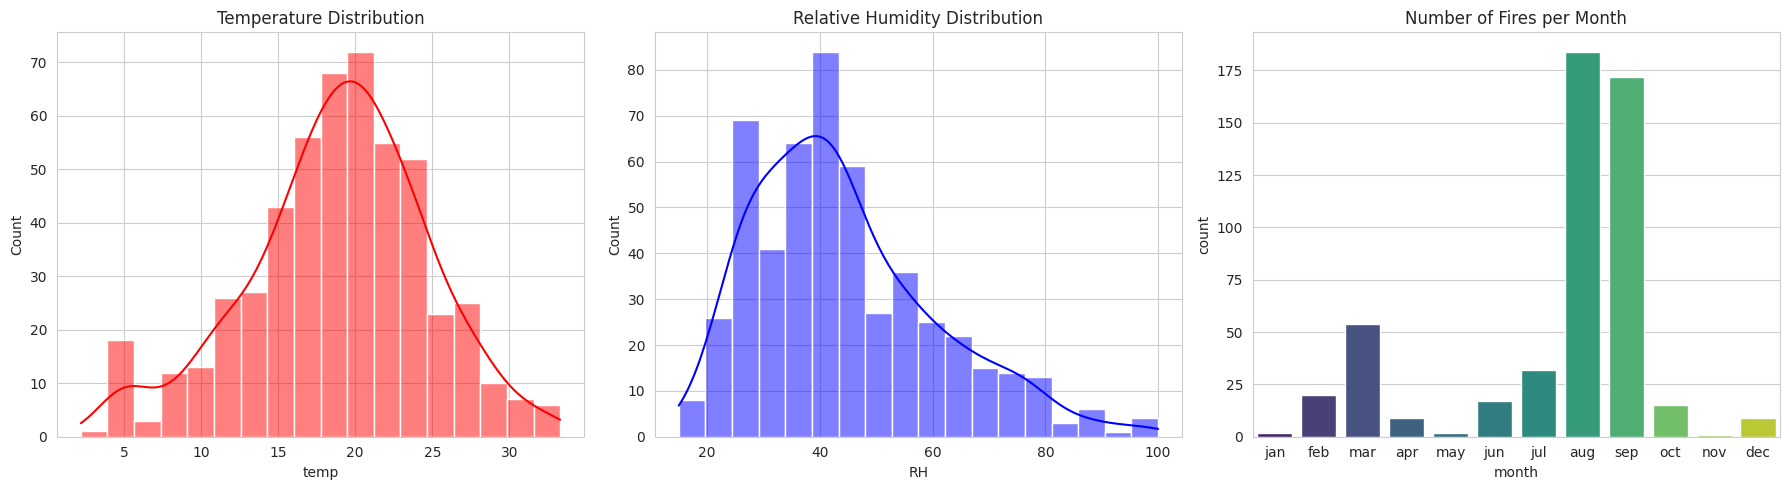

In [11]:
# ==============================================================================
#           CELL 3: Univariate Analysis
# ==============================================================================

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram for Temperature
sns.histplot(df['temp'], kde=True, ax=axes[0], color='red')
axes[0].set_title('Temperature Distribution')

# Plot histogram for Relative Humidity
sns.histplot(df['RH'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('Relative Humidity Distribution')

# Plot count plot for Month
# Order the months chronologically
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(x='month', data=df, ax=axes[2], order=month_order, palette='viridis')
axes[2].set_title('Number of Fires per Month')

plt.tight_layout()
plt.show()

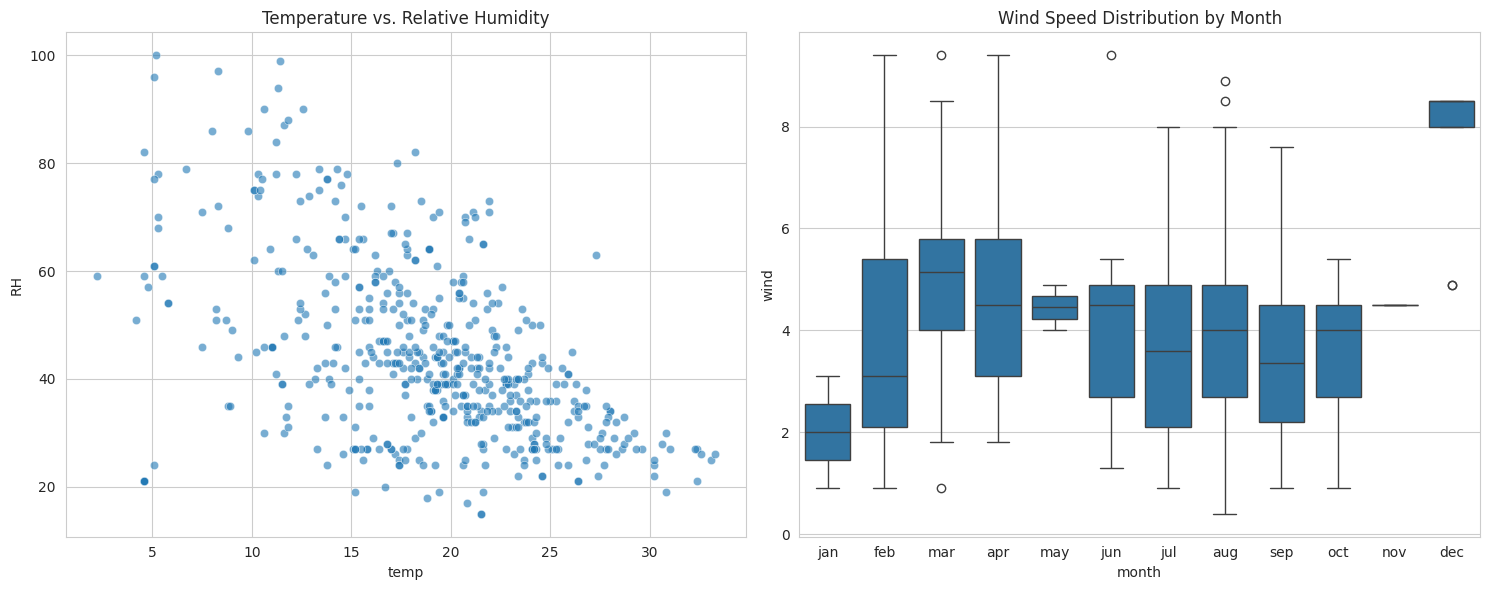

In [12]:
# ==============================================================================
#           CELL 4: Bivariate Analysis
# ==============================================================================

# Create a figure with a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Scatter Plot: Temperature vs. Relative Humidity ---
# We expect to see that as temperature rises, relative humidity tends to drop
sns.scatterplot(x='temp', y='RH', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title('Temperature vs. Relative Humidity')

# --- Box Plot: Month vs. Wind Speed ---
# This helps us see the distribution of wind speeds for each month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.boxplot(x='month', y='wind', data=df, ax=axes[1], order=month_order)
axes[1].set_title('Wind Speed Distribution by Month')

plt.tight_layout()
plt.show()

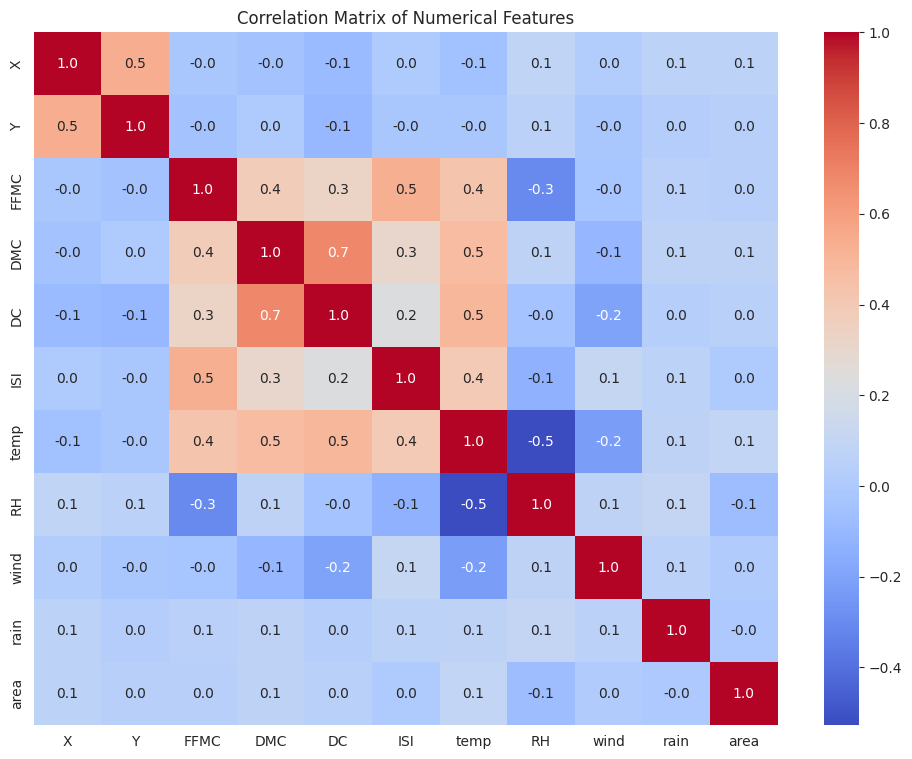

In [13]:
# ==============================================================================
#           CELL 5: Correlation Matrix
# ==============================================================================

plt.figure(figsize=(12, 9))

# Calculate the correlation matrix for numerical columns only
# The 'annot=True' argument displays the correlation values on the heatmap
# The 'fmt='.1f'' formats the numbers to one decimal place
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')

plt.title('Correlation Matrix of Numerical Features')
plt.show()

Generating pairplot (this may take a moment)...


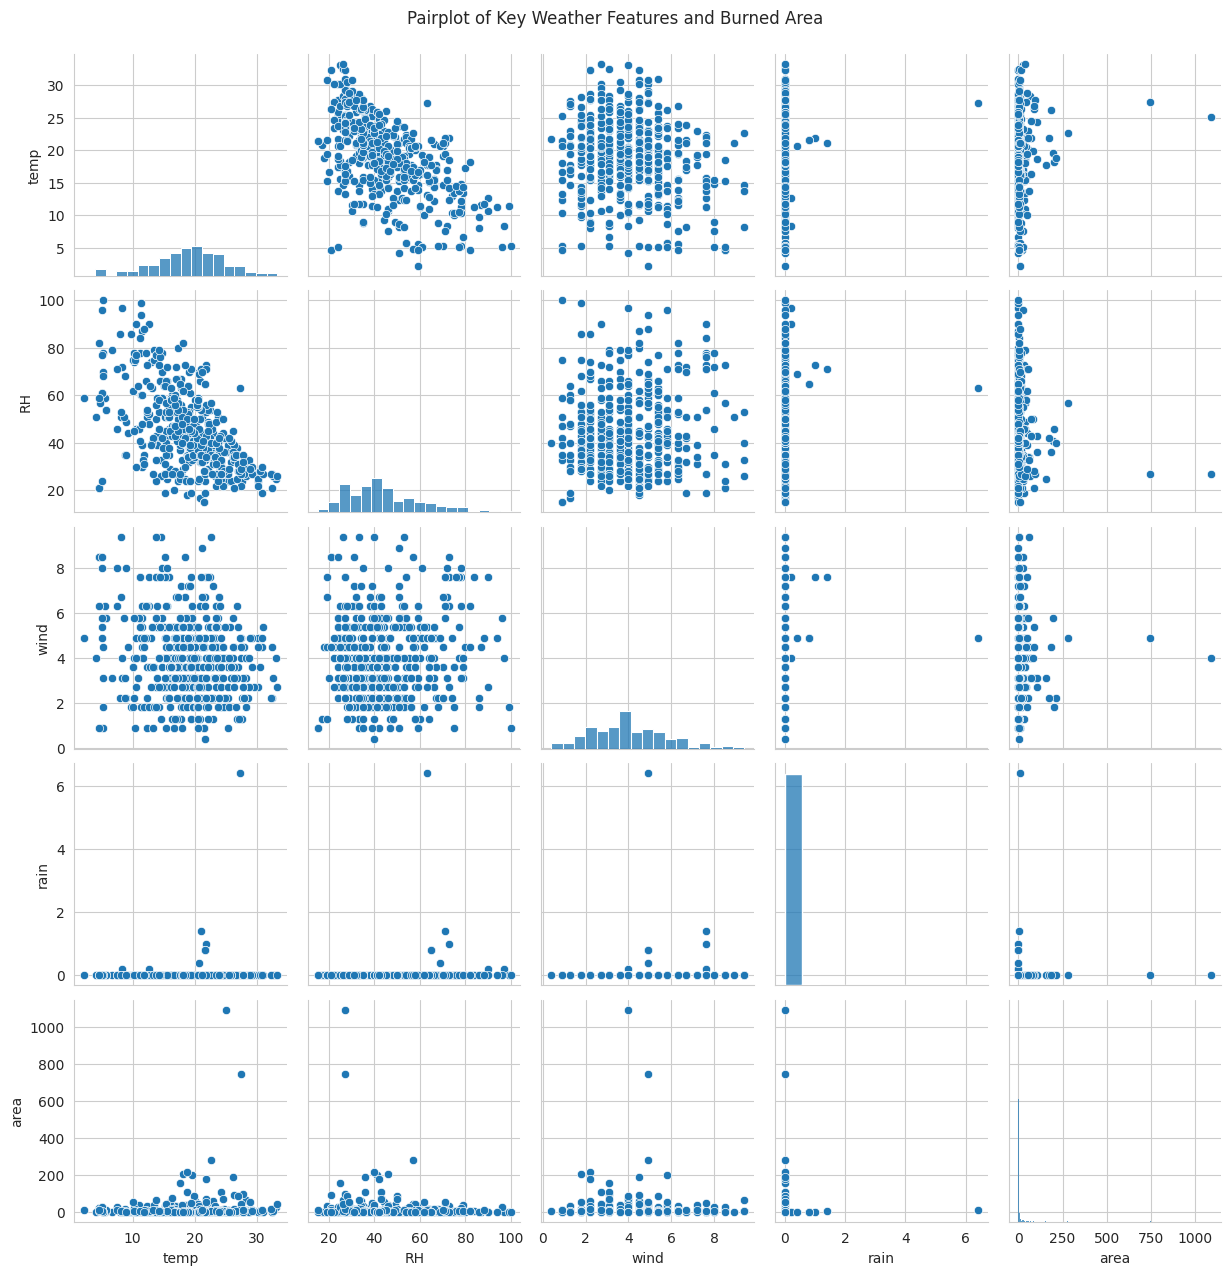

In [14]:
# ==============================================================================
#           CELL 6: Pairplot
# ==============================================================================

# We'll select a subset of important columns to make the plot more readable and faster to generate
columns_for_pairplot = ['temp', 'RH', 'wind', 'rain', 'area']

print("Generating pairplot (this may take a moment)...")

# The 'hue' parameter colors the dots by month, helping to spot seasonal patterns
sns.pairplot(df[columns_for_pairplot])

plt.suptitle('Pairplot of Key Weather Features and Burned Area', y=1.02)
plt.show()

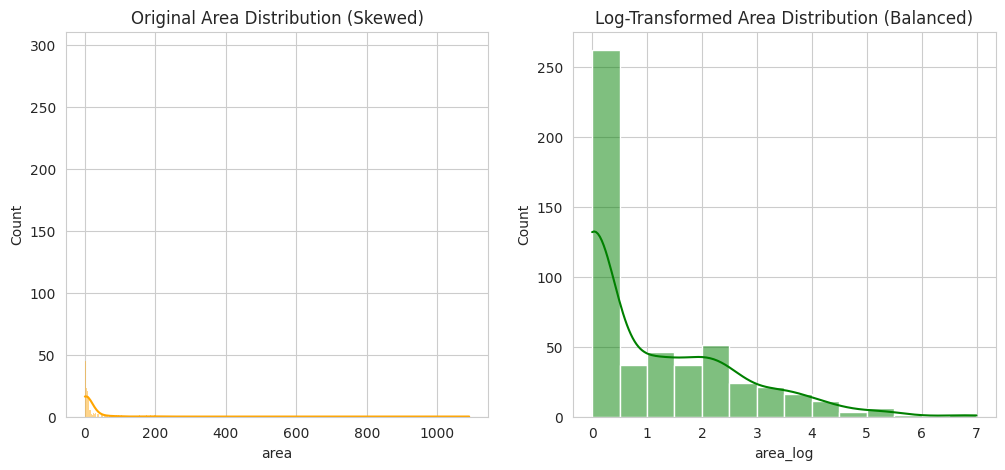


--- Data after One-Hot Encoding ---
   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_may  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  day_thu  \
0      False      False      False    False    False    False    False   
1      False       True      False    False    False    False    False   
2      False       True      False    False     True    False    False   
3      False      False      False    False    False    False    False   
4      False      False      False    False    False     True    False   

   day_tue  day_wed  
0    False    False  
1     True    False  
2    False   

In [15]:
# ==============================================================================
#           CELL 7: Data Preprocessing
# ==============================================================================

# --- 1. Log Transformation of the Target Variable ('area') ---
# We use np.log1p which calculates log(1 + x) to handle cases where area is 0
df['area_log'] = np.log1p(df['area'])

# Visualize the effect of the log transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['area'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Original Area Distribution (Skewed)')
sns.histplot(df['area_log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Log-Transformed Area Distribution (Balanced)')
plt.show()


# --- 2. One-Hot Encoding for Categorical Features ---
# Convert 'month' and 'day' into numerical columns
# drop_first=True helps to reduce multicollinearity
df_processed = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)

print("\n--- Data after One-Hot Encoding ---")
# Notice the new columns like 'month_aug', 'day_mon', etc.
print(df_processed.head())

In [16]:
# ==============================================================================
#           CELL 8: Feature Selection
# ==============================================================================

# The target variable (what we want to predict)
y = df_processed['area_log']

# The features (the data we use to make the prediction)
# We drop the original 'area' column and our new target 'area_log'
X = df_processed.drop(['area', 'area_log'], axis=1)

print("--- Feature Matrix (X) ---")
print(X.head())

print("\n--- Target Vector (y) ---")
print(y.head())

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

--- Feature Matrix (X) ---
   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_may  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_nov  month_oct  month_sep  day_mon  day_sat  day_sun  day_thu  \
0      False      False      False    False    False    False    False   
1      False       True      False    False    False    False    False   
2      False       True      False    False     True    False    False   
3      False      False      False    False    False    False    False   
4      False      False      False    False    False     True    False   

   day_tue  day_wed  
0    False    False  
1     True    False  
2    False    False  
3

In [17]:
# ==============================================================================
#           CELL 9: Split and Scale the Data
# ==============================================================================

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and then transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

print("✅ Data successfully split and scaled.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

✅ Data successfully split and scaled.
X_train shape: (413, 27)
X_test shape: (104, 27)


In [18]:
# ==============================================================================
#           CELL 10: Inspect the X_train Set
# ==============================================================================

# --- xtrain ---
# Display the first 5 rows of the scaled training data
print("--- First 5 rows of X_train_scaled ---")

# We can convert it back to a DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled_df.head())

--- First 5 rows of X_train_scaled ---
          X         Y      FFMC       DMC        DC       ISI      temp  \
0 -0.288472 -1.094859  0.280286 -0.150282  0.810272 -0.095838  0.797602   
1 -0.288472 -0.266696  0.061652  0.217866  0.549136 -0.455434 -0.205272   
2 -1.161285  0.561466  0.263468  0.614919  0.435442  1.419602  0.227001   
3 -0.724878 -0.266696  0.936186  1.048482  0.487669  1.419602  2.319206   
4  0.147934 -0.266696 -0.627884 -1.469227 -2.014816 -1.251682 -1.121692   

         RH      wind      rain  ...  month_may  month_nov  month_oct  \
0 -1.059419  0.001631 -0.067817  ...  -0.049266  -0.049266  -0.180278   
1 -0.335215 -1.008923 -0.067817  ...  -0.049266  -0.049266  -0.180278   
2  0.147588  0.001631 -0.067817  ...  -0.049266  -0.049266  -0.180278   
3 -1.059419 -1.008923 -0.067817  ...  -0.049266  -0.049266  -0.180278   
4  0.509690 -1.008923 -0.067817  ...  -0.049266  -0.049266  -0.180278   

   month_sep   day_mon   day_sat   day_sun   day_thu   day_tue   day_we